<a href="https://colab.research.google.com/github/aleguma/tf-cert/blob/main/03_computer_vision_and_convolutional_neural_networks_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What is a computer vision problem?

Basically anywhere where you want a computer to figure out patterns in visual information or understand what is going on in a visual scene.

A few examples:

* Binary classification (if some visual support is one thing o another). 
* Multi-class classification (if some visual element is more than one thing or another).
* Object detection (detect objects and establish where's the thing we're looking for on the image). Use case: *Tesla Autopilot*. 


## What we are going to cover (broadly) in this notebook

* Getting a dataset to work with (e.g., pizza_steak)
* Architecture of a **convolutional neural network (CNN)** with TensorFlow (one of the most popular deep learning architectures for computer vision)
* An end-to-end binary image classification problem
* **Steps in modeling with CNNs**
  * Creating a CNN, compiling a model, fitting a model, evaluating a model
* An end-to-end multi-class image classification problem
* Making predictions on our own custom images

## Computer vision inputs and output

* **Inputs**: numerical encoded versions of images as input for the ML algorithm. 
  * Represented as a tensor of shape: [*batch_size, width, height, color_channels*]. Like [None, 224, 224, 3] or [32, 224, 224, 3]. 32 is a vey common batch size. The shape may vary depending on the problem you are working on.
* **Outputs**: the ML algorithm produces prediction probabilities of which class is most likely depending on the photo image.
  * A tensor of shape: [*n*], which is a vector of *n* elements (corresponding to classes). The shape may vary depending on the problem you are working on.
* **Machine learning algorithm**: often convolutional neural networks (CNNs) are used to handle computer vision problems using deep learning techniques. They may be build from scratch or use an already existing one.




# What is a convolutional neural network (CNN)?

## (Typical) Architecture of a CNN

* **Input image(s)**: target images you'd like to discover pattens in. 
  * Whatever you can take a photo (or video) of
* **Input layer**: takes in target images and preprocesses them for further layers.
  * `input_shape = [batch_size, image_height, image_width, color_channels]`
* **Convolutional layer**: extracts/learns the most important featues from target images. 
  * Multiple typical values, you can create with `tf.keras.layers.ConvXD` (X can be multiple values). 2D means 2D data (such as images, i.e., width and height), 1D for text data and 3D for 3-dimensional data.
* **Hidden activation**: adds non-linearity to learned features (non-straight lines). 
  * Usually ReLU (`tf.keras.activations.relu`).
* **Pooling layer**: reduces the dimensionality of learned image features. Thus learn even the most important features out of the learned features. This layer reduces the number of calculations of CNNs have to make, making them more computationally efficient.
  * Typical values: *average* (`tf.keras.layers.AvgPool2D`) o *Max* (`tf.keras.layers.MaxPool2D`).
* **Fully connected layer**: further refines learned features from convolutional layers. It is usually the output layer.
  * Typical: `tf.keras.layers.Dense`
* **Output layer**: takes learned features and outputs them in shape of target labels.
  * `output_shape = [number of classes]` (e.g., 3 fo pizza, steak or sushi).
* **Output activation**: adds non-linearities to output layer.
  * Typical: `tf.keras.activations.sigmoid` (binary classification) or `tf.keras.layers.softmax` (multi-class classification).

Note: There are almost an unlimited amount of ways you could stack together a convolutional neural network. Example: Tiny VGG - https://poloclub.github.io/cnn-explainer/

A CNN is usually a stack of conv+pooling layers connected at the end with a fully connected/output layer. A simple CNN might have a conv+pooling+output layer, whereas a deeper CNN might have several conv+pooling layers before the fully connected layer. The inputs (and their preprocessing) are representations of images as tensors.


# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

The images we are working with are from the *Food101* dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101.

However, we have modified it to only use two classes: pizza and steak, using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note**: We start with a smaller data set so we can experiment quickly and figure out what works (or better yet what doesn't work) before scaling up. We will start with a small problem and we will gradually increase the complexity as we work towards building our application called food vision over the next modules.

In [1]:
## Get the data (we need some visual data)
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip  # download pizza_steak dataset to colab

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close() 
# it unzips in pizza_steak folder in the download place

--2022-09-20 05:08:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   222MB/s    in 0.5s    

2022-09-20 05:08:50 (222 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
# The data st is already split into train/test and folders with pizza/steak images!!
# That is standard format for a computer vision problem! It is not a tabular format, but a folder-based organization of the data!
# The directory names are the class names and also they divide the data set into train/test split using folders

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

Anda for a computer vision project...this usually means visualizing many examples of your data. 

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/

pizza  steak


In [5]:
!ls  pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [6]:
import os

# Walk through the pizza_steak directory and list the number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.


In [7]:
# If there is an extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak 

total 16
drwxr-xr-x 4 root root 4096 Sep 20 05:08 .
drwxr-xr-x 1 root root 4096 Sep 20 05:08 ..
drwxr-xr-x 4 root root 4096 Sep 20 05:08 test
drwxr-xr-x 4 root root 4096 Sep 20 05:08 train


In [8]:
# Another way to find out how many images are in a file/folder/directory
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))  # inspect the files of a directory
num_steak_images_train

750

To visualize our images, fist let's get the class names programmatically.

In [9]:
# Get the class names programatically (one way, may be many other ways)
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")   # data directory path object
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # creates a list of class names from the subdirectories of the data_dir path object
print(class_names)  # if you get .DS_Store in the class_names, just remove it getting the rest of the list! class_names[1:]

['pizza' 'steak']


In [10]:
# Let's visualize our images -> data explorer's motto = "visualize, visualize, visualize"
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set the target directory (we will view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)  # randomly sample one of the items in here
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])   #random_image is returned as a list, imread reads th image
  plt.imshow(img)  # show the image
  plt.title(target_class)
  plt.axis("off");

  # Show the shape of the image
  print(f"Image shape: {img.shape}")  # important to line up input and output shapes as the image will be turned into a tensor!!

  return img   # this returns the tensor representation of the image
  # When the image is read by mpimg.imread function it turns into a big array, which can be considered a tensor


['2694223.jpg']
Image shape: (512, 512, 3)


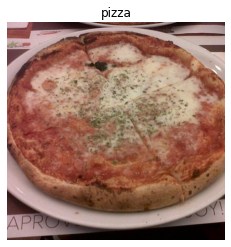

In [11]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [12]:
# Checking the images we want to figure out if they are different?
# If there is something that stands out on them? Anything we should know?
# It is usually a good idea to check many, many of them when working on a computer vision problem
# or a binary classification problem to get an idea of how they images are, that may explain
# later the training and evaluation results (i.e., some images are dodgy and is normal to not have a good performance on them, etc.)

In [13]:
# The viewing function above returns img as it is the tensor representation of the image
# When the image is read by mpimg.imread function it turns into a big array, which can be considered a tensor
img, img.dtype

(array([[[202, 171, 177],
         [203, 172, 178],
         [206, 175, 181],
         ...,
         [ 70,  43,  50],
         [ 69,  42,  49],
         [ 69,  42,  51]],
 
        [[205, 174, 180],
         [205, 174, 180],
         [207, 176, 182],
         ...,
         [ 69,  42,  47],
         [ 68,  39,  44],
         [ 66,  36,  44]],
 
        [[205, 174, 180],
         [205, 174, 180],
         [206, 175, 181],
         ...,
         [ 73,  43,  45],
         [ 71,  40,  45],
         [ 69,  38,  43]],
 
        ...,
 
        [[ 78,  47,  44],
         [ 79,  48,  45],
         [ 77,  46,  43],
         ...,
         [ 14,   0,   0],
         [ 15,   1,   1],
         [ 15,   1,   1]],
 
        [[ 81,  47,  45],
         [ 81,  47,  45],
         [ 79,  45,  43],
         ...,
         [ 14,   0,   0],
         [ 14,   0,   0],
         [ 15,   1,   1]],
 
        [[ 77,  42,  40],
         [ 77,  43,  41],
         [ 76,  42,  40],
         ...,
         [ 13,   0,   0],
  

In [14]:
# Transorming img into a tensor
import tensorflow as tf
tf.constant(img)   # preprocess images into a tensor

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[202, 171, 177],
        [203, 172, 178],
        [206, 175, 181],
        ...,
        [ 70,  43,  50],
        [ 69,  42,  49],
        [ 69,  42,  51]],

       [[205, 174, 180],
        [205, 174, 180],
        [207, 176, 182],
        ...,
        [ 69,  42,  47],
        [ 68,  39,  44],
        [ 66,  36,  44]],

       [[205, 174, 180],
        [205, 174, 180],
        [206, 175, 181],
        ...,
        [ 73,  43,  45],
        [ 71,  40,  45],
        [ 69,  38,  43]],

       ...,

       [[ 78,  47,  44],
        [ 79,  48,  45],
        [ 77,  46,  43],
        ...,
        [ 14,   0,   0],
        [ 15,   1,   1],
        [ 15,   1,   1]],

       [[ 81,  47,  45],
        [ 81,  47,  45],
        [ 79,  45,  43],
        ...,
        [ 14,   0,   0],
        [ 14,   0,   0],
        [ 15,   1,   1]],

       [[ 77,  42,  40],
        [ 77,  43,  41],
        [ 76,  42,  40],
        ...,
        [ 13,   0,   

In [15]:
# We are learning how to pre-process images into tensors!!!
# And tensors can be inputs of the CNN!!

In [16]:
# The images we have imported and plotted are actually giant arrays/tensors of different pixel values!!

In [17]:
# View the image shape
img.shape # returns, width, height and number of color channels

(512, 512, 3)

In [18]:
# We could pass this as this is a numerical representation of the data to our neural network
# However, to get the data better for the NN it must be preprocessed appropriately...
# One of the most important steps of prepocessing is...
# NORMALIZING / SCALING!! 
# So we have to normalize the pixel values of the tensor...

## Data preprocessing: normalizing /scaling

**Important note**: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for woking with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value). 

In [19]:
# Get all the pixel values between 0 & 1
img / 255.    # done!

array([[[0.79215686, 0.67058824, 0.69411765],
        [0.79607843, 0.6745098 , 0.69803922],
        [0.80784314, 0.68627451, 0.70980392],
        ...,
        [0.2745098 , 0.16862745, 0.19607843],
        [0.27058824, 0.16470588, 0.19215686],
        [0.27058824, 0.16470588, 0.2       ]],

       [[0.80392157, 0.68235294, 0.70588235],
        [0.80392157, 0.68235294, 0.70588235],
        [0.81176471, 0.69019608, 0.71372549],
        ...,
        [0.27058824, 0.16470588, 0.18431373],
        [0.26666667, 0.15294118, 0.17254902],
        [0.25882353, 0.14117647, 0.17254902]],

       [[0.80392157, 0.68235294, 0.70588235],
        [0.80392157, 0.68235294, 0.70588235],
        [0.80784314, 0.68627451, 0.70980392],
        ...,
        [0.28627451, 0.16862745, 0.17647059],
        [0.27843137, 0.15686275, 0.17647059],
        [0.27058824, 0.14901961, 0.16862745]],

       ...,

       [[0.30588235, 0.18431373, 0.17254902],
        [0.30980392, 0.18823529, 0.17647059],
        [0.30196078, 0

In [20]:
# Do this manually for every picture would be veeeeery tedious...
# Fortunately...
# TensorFlow has a function that normalizes all tensors that for us! Otherwise would be too tedious do it one by one!

# An end-to-end example

Let's build a convolutional neural network (CNN) to find patterns in our images. More specifically, we need a way to:

* Load our images
* Preprocess our images and get them into tensor-ready format (normalized tensor representations)
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to you training data

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# PREPROCESSING 

# Preprocess data (get all of the pixel value between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)   # creates batches of data and performs data augmentation
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"   # /content part is not needed
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # generates batches of data from directory
                                               batch_size=32,     # batch size, Google -> "yann lecun batch size"
                                               target_size=(224, 224), # this is the size we want all the images to be, so reshapes them if needed -> this shape still keeps much of the information, we can use other shapes
                                               class_mode= "binary", # we are importing data in a binary (two classes) format
                                               seed=42) # for reproducibility   

valid_data = valid_datagen.flow_from_directory(directory=test_dir,  # generates batches of data from directory
                                               batch_size=32,     # batch size
                                               target_size=(224, 224), # this is the size we want all the images to be, so reshapes them if needed  
                                               class_mode= "binary", # we are importing data in a binary (two classes) format
                                               seed=42) # for reproducibility   


# BUILD A CNN MODEL (SAME AS THE TINY VGG on the CNN EXPLAINER WEBSITE)
# We still did not cover the parameters in detail! More soon, but this is a complete example...
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),   # input shape (input images) the first layer is going to take, given/generated by the preprocessing function!!
    tf.keras.layers.Conv2D(10, 3, activation="relu"),   # is the exact same as the layer above
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),                      # flatten to give the input to the dense!!
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# COMPILE OUR CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),  # binary classification problem
                optimizer=tf.keras.optimizers.Adam(),  
                metrics=["accuracy"])

# FIT THE MODEL
history_1 = model_1.fit(train_data,    # flow_from_directory creates the data and labels automatically for us, that is why we do not pass X and Y to the fit method      
                        epochs=5,      # the data and the labels are created for us in this train_data object, thanks to the ImageDataGenerator class
                        steps_per_epoch=len(train_data), # the len gives the number of batches created of the specific batch_size with the data contained in the directory, in this case 47  batches of 32 samples (1500 images belonging to 2 classes)
                        validation_data=valid_data,       # we put things in batches so they can fit in memory of the computer chip
                        validation_steps=len(valid_data)  # it does 47 training steps per epoch, updating the patterns afte every step (batch processed)
                        )       
# One epoch is one pass through all the training data -> in this case this requires 47 steps for processing the 47 batches that split the training data!!

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 22s 216ms/step - loss: 0.5763 - accuracy: 0.6960 - val_loss: 0.4466 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4292 - accuracy: 0.8060 - val_loss: 0.3581 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3769 - accuracy: 0.8327 - val_loss: 0.3602 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3656 - accuracy: 0.8467 - val_loss: 0.3311 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3399 - accuracy: 0.8467 - val_loss: 0.3084 - val_accuracy: 0.8660


**Note**: If the above cell is taking longer than 10 seconds per epoch, make sure you are using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

In [22]:
# Usually the first epoch is about 50% longer than the other epochs, as it has to load all in memory
# Training without a GPU
#Epoch 1/5
#47/47 [==============================] - 84s 2s/step - loss: 0.6022 - accuracy: 0.6707 - val_loss: 0.4106 - val_accuracy: 0.8020

In [23]:
# Training with a GPU - resetting the runtime to use a GPU!! Blazingly fast!!!
#Epoch 1/5
#47/47 [==============================] - 24s 204ms/step - loss: 0.5739 - accuracy: 0.7160 - val_loss: 0.4221 - val_accuracy: 0.8180

In [24]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice/Exercise**: Check out [CNN EXPLAINER](https://poloclub.github.io/cnn-explainer/). Outstanding resource to understand and visualize CNNs! Amazing resource to understand how CNN work! Read all the document :)

In [25]:
# We built/replicated the same model that is deployed in CNN Explainer!!

In [26]:
# You can separate the activation functions from the individual layers as this...

#tf.keras.layers.Conv2D(10, 3)   # no activation function here
#tf.keras.layers.Activations(tf.nn.relu)   # adding the activation in an extra layer, in its own layer

# Is equivalent as this in the example: tf.keras.layers.Conv2D(10, 3, activation="relu")

In [27]:
# That is the only difference between our implementation and CNN explainer website!!

## Using the same model we built in the introduction to deep neural nets (no CNN architecture)

Let's replicate the model we've built in a previous module to see if it works with our image data.

To see if it works with our image data set...

The model we're building is from the [TF playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.70904&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).





In [28]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),   # we need to reshape or at least tell the NN that the input shape of the data is now 224 x 224 x 3 so it knows how to handle it (flattening it)
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),  # output layer
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data, 
            epochs=5, 
            steps_per_epoch=len(train_data),
            validation_data=valid_data,             # is like using .evaluate during training; it is testing the trained model in a test set at the same time we train
            validation_steps=len(valid_data))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


47/47 [==============================] - 9s 180ms/step - loss: 0.7756 - accuracy: 0.4887 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [29]:
# So the previous model is not quite working with image data...has the same accuracy as a coin toss!
# How can make this model more successful??
# What can we tweak/upgrade it to make it more successful with image data?

In [30]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [31]:
# WOW! Model_2 (non-CNN) has many more parameters than model_1 (CNN), 600.000 vs. 30.000!! That is 20x more parameters!
# Still having some more parameters, it performs terribly!
# Trainable parameters are learnable patterns that the model can figure out during training...
# They are individual numbers on large weight matrices! (patterns learned by the model when it starts to look at the training data)

Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly...let's try to improve it!

How can we improve the model? Adding layers, increase hidden units...

In [32]:
# Set the random seed
tf.random.set_seed(42)  # for results reproducibility

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),   # need to flatten the input tensors to be ingested by the network
    tf.keras.layers.Dense(100, activation="relu"),  # we increase the number of hidden units 25x
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),   # and we added an extra layer!
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model (did not change on any of the 3 models)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

# Most errors come from shapes! Remember always to verify and check the input shapes and so on! (value errors usually refer to that)

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 3.0006 - accuracy: 0.6027 - val_loss: 0.6399 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 8s 171ms/step - loss: 0.8755 - accuracy: 0.7220 - val_loss: 0.6956 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.8148 - accuracy: 0.6953 - val_loss: 0.6116 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.7279 - accuracy: 0.7227 - val_loss: 0.5104 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 8s 171ms/step - loss: 0.4989 - accuracy: 0.7707 - val_loss: 0.6178 - val_accuracy: 0.7280


In [33]:
# Model_3 did ok, much better than model_2 (basically guessing), but far from the CNN architecture!!

# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [34]:
# But model_3 has 500x more parameters than the CNN model!! It is 15.000.000 vs. 30.000!!
# And still does not perform anywhere near the CNN model!
# That is an example of the power of convolutional neural networks!!
# But this was also an example that DNN models are quite versatile
# However some models might work better for some problems
# So the kind of problem you are working with will dictate what kind of model should you use!!
# Usually for computer vision we use CNNs!

**Note**: You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of models we are using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network model, these are often more helpful in dechiphering between different **features** in an image (these relevant features in an image are learned by the CNN and not defined by us).

We still can use dense networks or dense layers to get a result on image data, but they are often not as good as when using CNN architectures!

Now we are going to go step-by-step on the end-to-end example to see what happens at each step...

But before, MUST READ: https://poloclub.github.io/cnn-explainer/

## Binary Classification: Let's break it down

Steps followed:

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing and turning our data into batches)
3. Created a model (start with a baseline, in our case was the *Food101* original paper that used *Random Forest* models. If the benchmark or reference does not exist )
4. Fit the model
5. Evaluate the model
6. Improve the model (adjust different parameters to enhance the model and try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['3466159.jpg']
Image shape: (512, 512, 3)
['771878.jpg']
Image shape: (512, 384, 3)


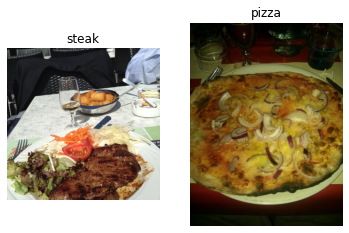

In [35]:
# Visualize, visualize, visualize data to get familiar and be one with the data, seeing possible patterns, characteristics, how different are between/among the classes, etc.
plt.figure()
plt.subplot(1, 2, 1)   # to plot the images side by side (1 row, 2 columns, 1st column...)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2) # (1 row, 2 columns, 2nd column...)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

In [36]:
# The beauty of neural networks it ath it figures out the things that is has to learn itself!
# We do not hand-code or do any feature engineering!
# It is always useful to visualize, visualize, and visualize the data and get familiar with it!

### 2. Preprocess the data (prepare it for a model)

In [37]:
# One of the most important steps is to split the data into a training and testing set (that is already done for us here, in folders)

# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of the data set that a model looks at during a training step. So instead of looking at all training samples at once and try to find patterns on the whole training set, a model might only look at 32 images at a time (i.e., if the batch size is of 32). 

It does this for a couple of reasons:
1. The whole data set (e.g., more than 10,000 images or more) might not fit into the memory of your processor (GPU). GPU memory siz can be found using `!nvidia-msi`.
2.  Trying to learn the patterns in the whole data set (e.g., 10,000 images) in one hit could result in the model not being able to learn very well. 

Why 32?

Because 32 is good for your health...https://twitter.com/ylecun/status/989610208497360896

This value is the default value on most libraries and the good way to go for most problems.

In [38]:
# Create train and test data generators and rescale the data 
# Every DL library provides efficient ways to load your data into memory so that the NN can find patterns in it -> TF is not an exception
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)  # the rescale says that when the images are loaded, divide all the values by 255 so we have them in the range between 0 and 1 (normalized)
test_datagen = ImageDataGenerator(rescale=1/255.)

# ImageDataGenerator doc -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
# Enables us to perform DATA AUGMENTATION in man ways (has many parameters)
# This will take the input data (batches) and apply the transformation defined....in this case just normalization!

In [39]:
# Load in our image data from directories and turn them into batches
# We use flow_from_directories because our images are in directories!
train_data = train_datagen.flow_from_directory(directory=train_dir,    # target directory of images
                                               target_size=(224, 224), # target size of images (height, width) -> all images not fitting exactly this will be resized to this size
                                               class_mode="binary",    # type of data you are working wih -> binary/two class data
                                               batch_size=32)          # size of minibatches to load data ino
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)
# we could create a validation_data splitting the test_data, but we are going to continue with 2 sets for now...  

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
# There are many parameters for the flow_from_directory, check them!
# RGB parameter can be relevan as RGB values order can change among implementations!
# Check the methods associated with ImageDataGenerator -> https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

In [41]:
# Using the flow_from_directory method will automatically infer the label of the images according to the directory they are, awesome!
# Let's see it...get a sample of a training data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train_data
len(images), len(labels)   # checking the batch size

(32, 32)

In [42]:
# How many batches are there?
len(train_data)   # rounded up as we have 1500/32 = 46.875, the last batch will have less images

47

In [43]:
# Get the first two images of the first batch and shape of the first image
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [44]:
# We can see that the image has been normalized (all pixel values between 0 and 1) -> each row is rgb
# And that the shape has also been resized to 224, 224, 3!
# So all the preprocessing to get the image data in folders ready for the NN has been done using TF amazingly!

In [45]:
# Let's check another image in the batch...
images[7], images[7].shape

(array([[[0.30588236, 0.17254902, 0.227451  ],
         [0.34901962, 0.21960786, 0.25490198],
         [0.4039216 , 0.2784314 , 0.2901961 ],
         ...,
         [0.16470589, 0.02745098, 0.1137255 ],
         [0.16862746, 0.01960784, 0.10980393],
         [0.15686275, 0.00784314, 0.10588236]],
 
        [[0.28235295, 0.14901961, 0.20392159],
         [0.34117648, 0.21176472, 0.24705884],
         [0.42352945, 0.29803923, 0.30980393],
         ...,
         [0.17254902, 0.02352941, 0.1137255 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16078432, 0.01176471, 0.10980393]],
 
        [[0.2627451 , 0.13725491, 0.19607845],
         [0.3254902 , 0.20000002, 0.24313727],
         [0.41960788, 0.29803923, 0.31764707],
         ...,
         [0.19215688, 0.04313726, 0.1254902 ],
         [0.1764706 , 0.02745098, 0.11764707],
         [0.16862746, 0.03137255, 0.1254902 ]],
 
        ...,
 
        [[0.62352943, 0.5803922 , 0.5568628 ],
         [0.6039216 , 0.56078434, 0.53725

In [46]:
# Awesome!!
# The shape is 224 x 224, we can reshape it at any shape we want, however...
# If we increase the shape of the images, the images make contain more data but also everything will take more time to compute to find patterns in!
# But it is also a value that can be tuned as well!

In [47]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [48]:
# It is a bunch of ones and zeroes representing "steak" and "pizza" or viceversa!
# We have to inspect what corresponds to, but it is automatic assignation and label imputation of the method used before!
# Awesome!
# As we go through and build our model and evaluate our model's predictions we will be able to reverse these labels and find out what they actually mean when we evaluate our model!

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

A simple CNN could be the baseline (not really deep architecture, e.g., a single CNN layer, a pooling layer and the fully connected layer output), seeing how this model performs on the data and then we may try to improve and see if a more deep CNN architecture (e.g., a stack of three cnn+pooling layers and the fully connected layer output) will work better on the data.

Why it is important to have a baseline?

> **NOTE**: In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g., look at which current mdoel is performing best in the field for your problem). 

In [49]:
# Make the creating of our model a little easier by importing specific classes/functions
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [50]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,     # the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3,   # same as (3, 3)  # the size of the sliding window going across an input
           strides=1,     # same as (1, 1) # the size of the step the sliding window takes across an input.
           padding="valid", # if "same", output shape is the same as input shape. If "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),   # input layer and specifying input shape as it is the first layer in the NN! Sometimes it can infer it, but sometimes you have to tell the shape!
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification so only 1 output neuron)
])

In [51]:
# So it is important to start with something simple, something you can control, get familiar with the data and see if it works with the data and then...
# Look for a more advanced/complex architecture! (e.g., Google search for "image classification best architectures" or "papers with code" is an awesome reference!!)

**IMPORTANT RESOURCE**: [paperswithcode.com](https://paperswithcode.com/) for state-of-the-art models for many problems (e.g., image classification)!!

### Breaking down the Conv2D layer

Understanding Conv2D hyperparameters:

**Filters**: hyper-parameter that decides how many filters should pass over an input tensor (e.g., sliding windows over an image).
  * Typical values: **10, 32, 64, 128** (higher values lead to more complex models).
  * It is the number of sliding windows going across an input.
  * Higher number = more complex model.

**Kernel size (also called filter size)**: determines the shape of the filters (sliding windows) over the input.
  * Typical values: **3, 5, 7** (lower values learn smaller features, larger values learn larger features). As we said, the features are learned by the NN itself, we do not define them!
  * The size of the sliding window going across an input.

**Padding**: pads the target tensor with zeros (if "same") to preserve input shape (keeps the amount of information in the input). Or leaves in the target tensor as is (if "valid"), lowering the ouput shape (compressing the information).
  * Typical values: **"same"** or **"valid"**.
    * **same**: output shape is same as input shape.
    * **valid**: output shape is compresseed.
    * Which one is better? Depends on the problem, experiment!

**Strides**: the number of steps a filter takes across an image at a time (e.g., if `strides=1`, a filter moves across an image 1 pixel at a time).
  * Typical values: **1 (default), 2**
    * It is the size of the step the sliding window takes across an input.
    * Larger values compress the information of the input concerning the output more!
    * What value to use? Depends on the problem. If the images are not informationally dense, you may get away wih setting stride to two. If not, you can keep stride to one.

So, a *Conv2D* layer is trying to go across an image and detect edges, detect features, detect different parts (most relevant ones)...as the image goes through different layers, so at the end an input that is being compressed into a small feature space. The features are no defined by us, the only that is defined by us is the hyper-parameters (e.g., filters going through the image, size of the kernel, padding, strides...). Then the rest is all figured out by the model itself (e.g., what features it should learn, what numbers it should set the kernel to, the different values on all of the filters and so on). 

**To learn**: Check and read the CNN explainer website: https://poloclub.github.io/cnn-explainer/

In [52]:
# Compile the model created model_4
model_4.compile(loss="binary_crossentropy",   # we are in a binary classification problem
                optimizer=Adam(),  # as we imported it we do not have to write tf.keras.optimizers.Adam()
                metrics=["accuracy"])

In [53]:
# Get a summary of our model
model_4.summary()   # so we can see how the input changes throughout the network
# the output reduces as we set padding to valid, if we want to maintain the size we should set it at same
# so as the input goes through the layers, it loses the edges...
# so the input gets smaller as it goes through the convolutional layers towards the output layer.
# This CNN has many more parameters than the first one we built, the reason is that we do not have any pooling layer.
# We will deal with pooling layers later!

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [54]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)   # should provide the number of batches (of size 32)

(47, 16)

In [55]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is a combination of labels and sample data, so we do not need to specify X and Y, the fit method is smart enought to figure it out.
                        epochs=5, 
                        steps_per_epoch=len(train_data),  # this is telling TF to step through the training set, that for each epoch, take 47 steps (one per batch)
                        validation_data=test_data,  # we want to validate at the same time it is training!
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 213ms/step - loss: 1.2171 - accuracy: 0.6407 - val_loss: 0.4771 - val_accuracy: 0.7740
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.4690 - accuracy: 0.7887 - val_loss: 0.4239 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3547 - accuracy: 0.8600 - val_loss: 0.4194 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.2042 - accuracy: 0.9307 - val_loss: 0.5003 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.0893 - accuracy: 0.9793 - val_loss: 0.6710 - val_accuracy: 0.7720


In [56]:
# It is not bad for a first try, but performs worse than model_1
model_1.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.3084 - accuracy: 0.8660


[0.30842655897140503, 0.8659999966621399]

In [57]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [58]:
# That is because model_1 has a combination of convolutional layers and max pooling layers!
# So that gives a hint that our baseline model (model_4) may improve if we add some conv layers and some max pooling layers.
# Seems the baseline model performs better than guessing (depends on how many classes and samples you have of each class), as guessing it is usually around 50%
# But ofc we always want to improve it!

### 5. Evaluate our model

It looks like our model is learning something, let's evaluate it.

One way is to check out the training curves. Another ways is using some common classification evaluation metrics (e.g., accuracy, precision, recall, f1 score, confusion matrix). Accuracy is in this case already used in the compile method. Usually when using a distinct performance metric to accuracy, we have to make some predictions and then compare them with the ground truth labels.

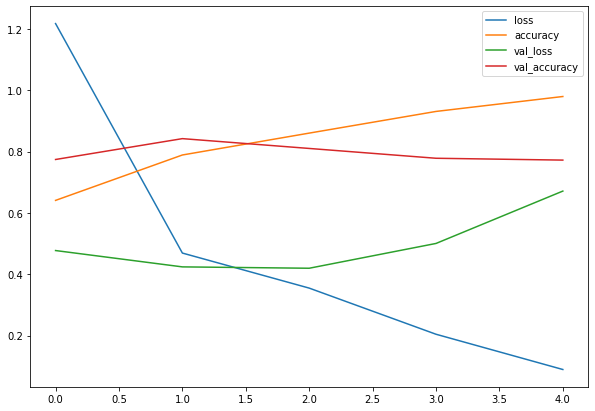

In [59]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))   # easiest way to plot the curves is using pandas

In [60]:
# The X-axis are the epochs, the vertical axis is the value (loss and accuracy)
# Initially loss is high (the model is more wrong), as loss is a measure of how wrong our model is
# Then it goes down...
# The other loss and the accuracy seem more consisten over time
# But there are too many curves in this plot, let's separate them

In [61]:
# Plot the validation and training curves separately
# We will create an auxiliary function for that...
# To avoid this, we could have used the tensorboard callback to have the same stuff automatically done
# Try it adding it as an alternative! -> in the fit -> callbacks=[tensorboard_callback]
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]   # they are taken from the training verbose output (table row format there)
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))  # how many epochs did we run for?

  # Plot loss in one figure
  plt.plot(epochs, loss, label="training loss", color="blue")
  plt.plot(epochs, val_loss, label="validation loss", color="green")
  plt.title("Loss curves")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy in another figure
  plt.figure() # creates another figure
  plt.plot(epochs, accuracy, label="training accuracy", color="blue")
  plt.plot(epochs, val_accuracy, label="validation accuracy", color="green")
  plt.title("Accuracy curves")
  plt.xlabel("Epochs")
  plt.legend();

# Writing many helper functions we might like to store them all in a library/module to call them whenever we need and not rewrite them over and over!!

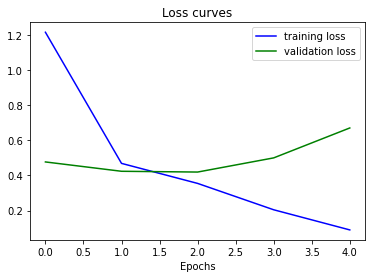

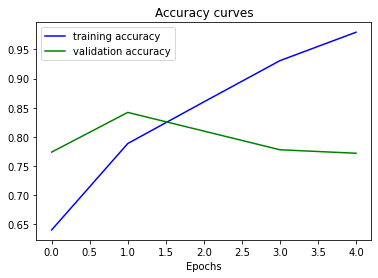

In [62]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)   # makes easier to understand as there are only 2 curves in each plot!

In [63]:
# So the training loss is good, it is going down, that is what we want...
# But the validation loss is quite straight, it is not going down, so...

> **Note**: When a model's **validation loss starts to increase**, it is likely that the model is **overfitting** the training data set. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

The model has seen only the training data and has not seen the test data. So it is learning patterns in the training data so it can recognize the test data. So it is important to monitor the training curves for overfitting signals.

A big part of Deep Learning (and ML in general) is to use ways to prevent overfitting (model memorizing the training data and not actually learning and being able to generalize to unseen data). 

The opposite phenomenon, when the training loss isn't decreasing and the model has learned the training data set poorly, it is called **underfitting**.   

In [64]:
# We could evaluate other metrics such as precision, recall, etc,...but we are not going to deal with it now.

> **Note**: Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences the model may be **overfitting** (or also underfitting).

Overfitting occurs when it learns the training data set too well (training loss curve going down) and no generalizing well to unseen data (val loss going up or not going down). 

But this is not a really a very bad thing (if addressed) as it is part of finding the appropriate model (see below).

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps (simplified version as there are more steps):

0. **Create a baseline (creating a simple model to check if it works with data).**
1. **Beat the baseline by overfitting a larger model.**
2. **Reduce overfitting.**

**Ways to induce overfitting** (step 1 above):

* Increase the number of convolutional layers (i.e., make the NN deeper).
* Increase the number of convolutional filters (i.e., *filters* are hidden units in terms of convolutional layers within those layers).
* Add another dense layer to the output of our flattened layer
* ...there are more ways, but these are the main knobs to turn when increasing or inducing overfitting.

**Ways to reduce overfitting** (step 2 above):
* Add data augmentation
* Add regularization layers (such as MaxPool2D) (i.e., reduce model complexity)
* Add more data
* ...

**Note**: Reducing overfitting is also known as **regularization**.


In [65]:
# Let's fight overfitting!

# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),  # as it is the first layer in the model we need to define the input shape
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),   # we see the combination used conv+maxpool in pairs, repeated
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

**Pooling** layers downsample, they condense the input to a smaller ouput, and the main idea is that if Conv2D layers find features in an image, the pooling layers finds the most important parts of those features.

In [66]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [67]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6500 - accuracy: 0.6307 - val_loss: 0.5082 - val_accuracy: 0.7580
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4738 - accuracy: 0.7880 - val_loss: 0.4077 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.4098 - accuracy: 0.8153 - val_loss: 0.3319 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3860 - accuracy: 0.8320 - val_loss: 0.3247 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 9s 184ms/step - loss: 0.3843 - accuracy: 0.8247 - val_loss: 0.3265 - val_accuracy: 0.8720


In [68]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [69]:
# As we can see the pooling layers used in this architecture half the size of the input as their output
# Consequently, also the # of parameters is significantly reduced, thus the model is less complex!

In [70]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [71]:
# model_4 has 50 times more parameters than model_5 and provides less accuracy!
# model_5 outperforms model_4 thanks to the pooling layers!
# Let's see their effect in the training curves

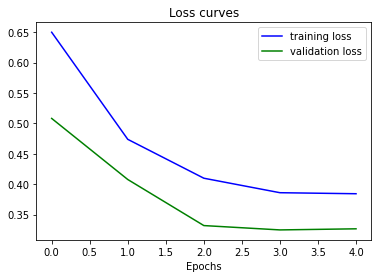

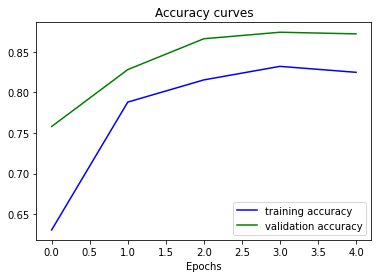

In [72]:
# Plot loss curves of model_5
plot_loss_curves(history_5)

In [73]:
# Amazing curves!
# As said before, ideally the training and validation loss curves should be very similar to each other
# In this case they are not very similar, but much better than for model_4! At least both they are heading in the same direction!
# Looks like if we train for longer, they might be keep going down!
# The same with the accuracy curves
# So what Max pooling has done is essentially remove and condense features so the model has the best chance to only learn the most important features!!
# Even though it has a lower number of total learnable parameters, these parameters are of a higher value/importance. Or at least that what it seems from evaluating the model!

So this is one way of reducing overfitting (regularization)...

The objective here is to align the loss curves as much as possible, meaning that the model is performing as well in the training set as on the validation set; that means the model is performing similarly on training data than in data is has never seen before (the model is generalizing to unseen data). 

Let's use other techniques to reduce overfitting...


### Opening our bag of tricks and finding data augmentation

In [74]:
# Create ImageDataGenerator training instance with DATA AUGMENTATION
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # how much do you want to rotate an image?
                                             shear_range=0.2,  # how much do you want to shear an image?
                                             zoom_range=0.2,  # zoom in randomly on an image
                                             width_shift_range=0.2,  # move your image around on the x-axis
                                             height_shift_range=0.2,  # move your image around on the y-axis
                                             horizontal_flip=True)   # do you want to flip an image?
# Previous is a train_data instance with data being augmented...
# These are some examples of augmentation parameters that can be applied, but there are many more!! Check the documentation for more, these are common ones!

# Now let's reinstantiate our original training data...(as before)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

**Question**: What is **DATA AUGMENTATION**?

**Data augmentation** is the process of altering our training data, making it to have more diversity and, in turn, allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's also remind other ways to improve a model from data perspective...

## (Brief on) IMPROVING A MODEL (FROM A DATA PERSPECTIVE)

Methods to improve a model (reduce overfitting) and what they do:

* **More data** : gives a model more of a chance to learn patterns between samples (e.g., if a model is performing poorly on images of pizza, show it more images of pizza).
* **Data augmentation** : increase the diversity of your training dataset without collecting more data (e.g., take your photos of pizza and randomly rotate them 30 degrees). Increased diversity forces a model to learn more generalizable patterns.
* **Better data** : not all data samples are created equally. Removing poor samples from or adding better samples to your dataset can improve your model's performance.
* **Use transfer learning** : take a model's pre-learned patterns from one problem and tweak them to suit your own problem. For example, take a model trained on pictures of cars to recognize pictures of trucks. 

Now, let's write some code to visualize data augmentation...

In [75]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)  # for demonstration purposes only, just to see what is going on when we augment the data
                                                                                   # as it is a good idea always to introduce as much randomness as possible into the data sets, that is why the shuffle parameter is by default set to True 
# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)  # again for demonstration

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),  # better to type it in a constant variable style -> IMG_SIZE = (224, 224)
                                              batch_size=32,
                                              class_mode="binary")   # we are not going to visualize this data set, so we keep shuffle=True (default) here

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


> **Note**: **Data augmentation** is usually **only performed on the training data**. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they are loaded into the model. 

We want to make it hard to the model to learn parameters on the training data (so that is why it is augmented, more varied) that hopefully will translate in a better generalization, that is, performance on the non-augmented test data.

The methods of `ImageDataGenerator` do not actually modify the data in the directories, but they perform the modifications on the fly, when the data is actually used and loaded into the model.

Finally...let's visualize some augmented data!!!

In [76]:
# Get sample (augmented and non-augmented) data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()  #NOTE: labels aren't augmented...only data (images)!!
# as we didnt shuffle (randomized the order in that they are loaded) them we know that both are composed of exactly the same data!! So instead of augmented_labels we could put _, as it is the same as labels
# shuffles randomized the order of the loaded data set (images)

Showing image number: 21


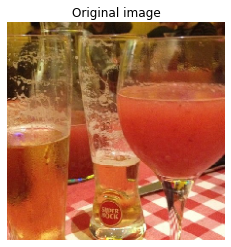

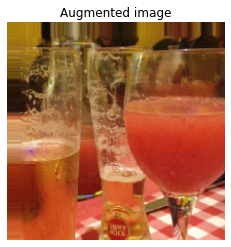

In [77]:
# Show the original image and the augmented image
import random
random_number = random.randint(0, 32) # our batches are of size 32...
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [78]:
# With augmented data we are trying to introduce some diversity in lightning, focus, etc. that may reflect better real world data!
# The parameters defined in ImageDataGenerator for augmented data are taken to randomly modify the image (e.g., rotation range, etc.) and they can be tuned at will!
# Experiment how much tune of the values you should use! Also look at examples online where other people have found data augmentation to work and try them out!
# Not all the tunes you can do might work well (e.g., x-axis and y-axis shift create strange pictures in our example! (e.g., image 24))

## What is data augmentation?

Looking at the same image but from a different perspective(s). Modifying the original image in some way. There are many different kinds of data augmentation such as rotating, shifting, zooming, cropping, replacing, shearing, etc. 

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data. 

In [79]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")   # as it is a binary classification problem, if multi-class we would use softmax
])

# Compile the model
model_6.compile(loss="binary_crossentropy",  # if multi-class would be sparse_categorical_crossentropy or categorical_crossentropy
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,  # fitting model_6 on augmented training data
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 448ms/step - loss: 0.7000 - accuracy: 0.5433 - val_loss: 0.6746 - val_accuracy: 0.5320
Epoch 2/5
47/47 [==============================] - 21s 441ms/step - loss: 0.6972 - accuracy: 0.5367 - val_loss: 0.6514 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 21s 454ms/step - loss: 0.6831 - accuracy: 0.6133 - val_loss: 0.6573 - val_accuracy: 0.5860
Epoch 4/5
47/47 [==============================] - 21s 438ms/step - loss: 0.6738 - accuracy: 0.5580 - val_loss: 0.6297 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 21s 442ms/step - loss: 0.6461 - accuracy: 0.6993 - val_loss: 0.5677 - val_accuracy: 0.8200


In [80]:
# The model takes more time to train as the augmented data requires manipulation on the fly (not modifying the original data) and that takes time!
# So have that in mind that if we use data augmentation, training might take a bit longer if the modifications are done on the fly (while loading the data).

# Another point is that the results are not that good. We are trying to reduce overfitting but maybe we made it too hard for the model to learn patterns on the training data
# So maybe we used too many data augmentation options!! So that is something to keep in mind if the results aren't as good as you would like them you can turn the the knobs back and forth, increase/decrease augmentation...

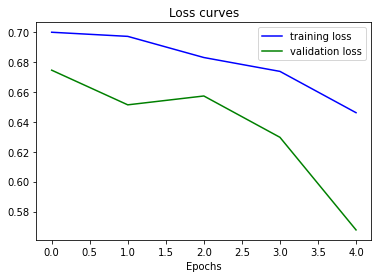

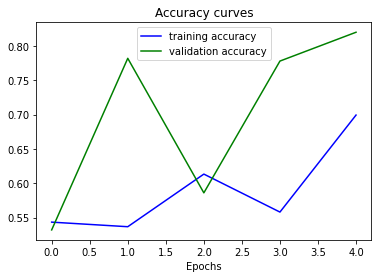

In [81]:
# Check our models training curves (as we are trying to fight overfitting)
plot_loss_curves(history_6)

In [82]:
# So both lines are getting closer, following the expected trend (going down for loss, and going up for accuracy), but not ideal
# So why our model got such poor results at the beginning? 
# We made our data harder to learn on! But it is also the fact that we did not shuffle it! (the data is taken sequentially from the directories)
# If we turn shuffling to default (True), basically picking the samples at random...what happens?
# Let's try a model using data augmentation and shuffling the instances at random!!

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens. 

In [83]:
# Import data and augment it and shuffle it from training directory
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)  # it is the default value but we put it to emphasize it!

Found 1500 images belonging to 2 classes.


In [84]:
# Create the model (same as model_5 and model_6)
# In these last experiments we just tweak the data, not the model, so we can see that if something is wrong/changing is due to the data, as the models are the same
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,  #we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 442ms/step - loss: 0.6682 - accuracy: 0.5887 - val_loss: 0.6061 - val_accuracy: 0.6740
Epoch 2/5
47/47 [==============================] - 21s 441ms/step - loss: 0.5928 - accuracy: 0.6880 - val_loss: 0.5304 - val_accuracy: 0.7240
Epoch 3/5
47/47 [==============================] - 21s 441ms/step - loss: 0.5103 - accuracy: 0.7513 - val_loss: 0.3757 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 20s 436ms/step - loss: 0.4812 - accuracy: 0.7760 - val_loss: 0.3543 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 21s 455ms/step - loss: 0.4653 - accuracy: 0.7880 - val_loss: 0.3948 - val_accuracy: 0.8200


In [85]:
# Awesome! Accuracy on both datasets increased significantly. That's the power of shuffling training data!!

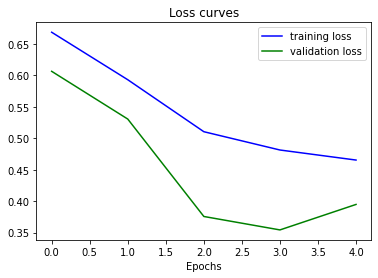

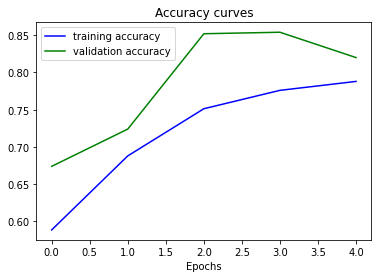

In [86]:
# Plot the loss curves
plot_loss_curves(history_7)

In [87]:
# Pretty good loss curves (both losses decreasing, both accuracies going up)
# When we compare the accuracy between model_6 and model_7, we see that model_6 did not improve much in the 5 epochs while model_7 did significantly jumped and outperformed model_6 in 3 epochs!
# WHY?
# If we do not shuffle the data, the model will get all the pizza images before, and then the steak images (one class after the other sequentially as they are in the folders), this means it learns the patterns in pizza photos
# then, when it is halfway on the training, it receives all the images of steak, so it has to adjust all parameters for this new class. And this repeats over and over.
# Whereas if we shuffle, it looks at random images of both classes throughout every epoch (not first one class and then the other), so it is learning the patterns simultaneously and it does not have to readjust every time for each class halfway through training!
# SHUFFLING (as the other data pre processing steps) is critical, always ensure that data is shuffled (and also pre-processed and in right order) if the model is performing poorly/showing weird results on the training data (from a data perspective)!!

> **Note**: when shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images at the same time (in our case, pizza & steak at the same time instead of just pizza and then steak).

### 7. Repeat until satisfied

How would you keep going? How would you improve the model's performance?

Since we've already beaten our baseline, there are a few things we could try to continue improving our model:

* Increase the number of model layers (e.g., add more `Conv2D`/`MaxPool2D` layers).
* Increase the number of filters in each convolutional layer (e.g., from 10 o 32 or even 64).
* Train for longer (more epochs).
* Change the activation functions.
* Change the optimization function.
* Find an ideal learning rate (using the method used previously).
* Get more data (give the model more opportunities to learn).
* Use **transfer learning** to leverage what another image model has learned and adjust it for our own use case.


**Practice**: Recreate the model on the CNN explainer website (same as `model_1` above) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our custom data


In [88]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-09-20 05:35:23--  https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg
Resolving iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)... 139.99.63.197
Connecting to iamafoodblog.b-cdn.net (iamafoodblog.b-cdn.net)|139.99.63.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405714 (396K) [image/jpeg]
Saving to: ‘how-to-cook-steak-1061w.jpg’

how-to-cook-steak-1 100%[===================>] 396.21K  --.-KB/s    in 0.01s   

2022-09-20 05:35:23 (38.1 MB/s) - ‘how-to-cook-steak-1061w.jpg’ saved [405714/405714]



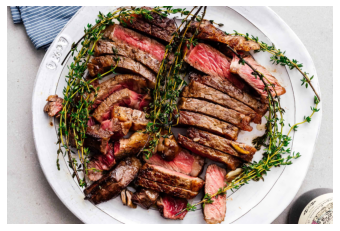

In [90]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://iamafoodblog.b-cdn.net/wp-content/uploads/2021/02/how-to-cook-steak-1061w.jpg  # download
steak = mpimg.imread("how-to-cook-steak-1061w.jpg")  # load it
plt.imshow(steak) # show it
plt.axis(False);

In [91]:
# Check the shape of our image
steak.shape

(1668, 2500, 3)

In [92]:
# Check the values
steak

array([[[135, 129, 131],
        [134, 128, 130],
        [130, 124, 126],
        ...,
        [228, 228, 228],
        [228, 228, 228],
        [228, 228, 228]],

       [[134, 128, 130],
        [132, 126, 128],
        [129, 123, 125],
        ...,
        [228, 228, 228],
        [228, 228, 228],
        [228, 228, 228]],

       [[132, 126, 128],
        [130, 124, 126],
        [127, 121, 123],
        ...,
        [228, 228, 228],
        [228, 228, 228],
        [228, 228, 228]],

       ...,

       [[222, 222, 222],
        [220, 220, 220],
        [216, 216, 216],
        ...,
        [242, 234, 223],
        [237, 229, 218],
        [232, 224, 213]],

       [[222, 222, 222],
        [220, 220, 220],
        [216, 216, 216],
        ...,
        [238, 230, 219],
        [233, 225, 214],
        [229, 221, 210]],

       [[222, 222, 222],
        [220, 220, 220],
        [216, 216, 216],
        ...,
        [235, 227, 216],
        [230, 222, 211],
        [226, 218, 207]]

So can we pass the image as it is to our model? Just like this in this tensor format (no image ofc)?

**NO**, even if we use `tf.expand_dims(image, axis=0)` to add the batch size dimension, the image width and height is not matching the training data ones. 

> **IMPORTANT NOTE**: When you train a neural network and you want to make a prediction with it on your own custom data, it is important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [94]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it 
  to (img_shape, img_shape, color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img)                # tf.image module has a lot of functions to deal with image data, check it! It has also modules to other kind of data, check the documentation!

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])

  # Rescale the image values (pixels) (get all values between 0 and 1)
  img = img/255.

  return img

In [95]:
# In case of doubt, search for "tensorflow how to load XXX data" and there is extensive documentation on how to do it!
# Example: https://www.tensorflow.org/tutorials/load_data/images    (after googling, how to load image tensorflow)

In [96]:
# Load in and preprocess our custom image
steak = load_and_prep_image("how-to-cook-steak-1061w.jpg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.45784345, 0.44215718, 0.44607875],
        [0.3745051 , 0.37058353, 0.35930997],
        [0.54955965, 0.59952307, 0.6762387 ],
        ...,
        [0.89880896, 0.89880896, 0.89880896],
        [0.89411765, 0.89411765, 0.89411765],
        [0.89411765, 0.89411765, 0.89411765]],

       [[0.4889356 , 0.47324932, 0.47717088],
        [0.4292773 , 0.41950557, 0.4429706 ],
        [0.37165502, 0.41325164, 0.53640527],
        ...,
        [0.90427524, 0.90427524, 0.90427524],
        [0.874261  , 0.874261  , 0.874261  ],
        [0.8941532 , 0.8941532 , 0.8941532 ]],

       [[0.53196776, 0.5162815 , 0.52020305],
        [0.44090104, 0.40560693, 0.4095285 ],
        [0.2994581 , 0.36962613, 0.46521434],
        ...,
        [0.90850025, 0.90850025, 0.90850025],
        [0.87748545, 0.87748545, 0.87748545],
        [0.9019608 , 0.9019608 , 0.9019608 ]],

       ...,

       [[0.85490197, 0.85490197, 0.85490197],
        [0.87

In [97]:
# Awesome, the image is preprocessed and ready to be ingested!
# Size is 224, 224, 3 and the pixel values are between 0 and 1! Awesome!

In [98]:
# Let's predict
pred = model_7.predict(tf.expand_dims(steak, axis=0)) # if we do not expand the dimensions (for the batch size) it creates an error, it expects a 4 dimensional tensor!
pred

array([[0.9997695]], dtype=float32)

In [99]:
# It outputs a prediction probability! This is how likely the image belongs to one class or another!
# As we are working in a binary classification, if the prediction probability is over 0.5, then is class 1 (positive class); otherwise, class 0
# But we have categorical images, so what is class 1 here? (Most likely they are in alphabetical order, so pizza = 0, and steak = 1), but let's make it more clear!!

In [100]:
# The model outputs prediction probabilities, but we need a way to interpret them! Know what class it corresponds to in the binary case!

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [101]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [102]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]  # round the tensor probabilities
pred_class

'steak'

In [103]:
# Awesome!!! It is correct!!!
# Now let's create a function that predicts and plots!

In [104]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title"
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)   # previously created function, returns a 3 dimensional tensor

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))  # expand the dimensions as our model expect 4 dimensional tensors (batch size as first dim)

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]  # binary case, as done in the cell above; the cutoff could be changed at will like 0.6 would round to 1 and less than 0.6 to zero, it depends on the problem we are working with!

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

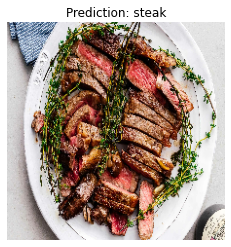

In [105]:
# Test our model on a custom image
pred_and_plot(model_7, "how-to-cook-steak-1061w.jpg", class_names)

In [106]:
# AWESOMEEEEEEEEEEEEEEEEEEEEEEEEEEEE!!!!

Our model works! Let's try it on another image...this time pizza!

--2022-09-20 05:35:45--  https://bakeitwithlove.com/wp-content/uploads/2022/02/tortilla-pizza-sq.jpg
Resolving bakeitwithlove.com (bakeitwithlove.com)... 172.64.149.129, 104.18.38.127, 2606:4700:4400::6812:267f, ...
Connecting to bakeitwithlove.com (bakeitwithlove.com)|172.64.149.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244289 (239K) [image/jpeg]
Saving to: ‘tortilla-pizza-sq.jpg’

tortilla-pizza-sq.j 100%[===================>] 238.56K  --.-KB/s    in 0.005s  

2022-09-20 05:35:45 (43.3 MB/s) - ‘tortilla-pizza-sq.jpg’ saved [244289/244289]



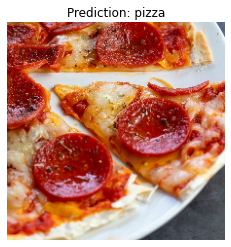

In [107]:
# Download another test custom image and make a prediction on it
!wget https://bakeitwithlove.com/wp-content/uploads/2022/02/tortilla-pizza-sq.jpg
pred_and_plot(model_7, "tortilla-pizza-sq.jpg", class_names)

In [108]:
# AMAZIIIINGGGGGGGGGGG!!!! Accurate prediction!!! Vamosss!!! 

We worked in a binary class problem...how would we deal with a multi-class problem? Let's go for it!

## Multi-class Image Classification (end-to-end example)

We have just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we are going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
  * Overfitting is when a model learns too well on the training data and does not generalize well. But then we can fix overfitting. Overfitting is not a bad thing because it means our model is learning something.
5. Evaluate the model
6. Adjust different types of hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied (we are serial experimenters so not we can jump back and forth between steps, they are not carved into stone, they are just guidelines)

### 1. Import and become one with the data

In [109]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# More on how the data set was created here: 
# https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-09-20 05:35:45--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   221MB/s    in 2.2s    

2022-09-20 05:35:47 (221 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [110]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [111]:
# There are 10 directories in total in the training data set
# And there are 750 images in each of these directories
# There are 10 directories also in the test data set
# There are 250 images in each of these directories
# Each directory is a class!!
# All this data structure was performed using the Food101 data set that can be found on Kaggle

This file structure is very common for image classification. That is, to have your data set split into train and test and then the different classes are indicated as the names of the directories for whichever image is inside each particular directory. 

In [112]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [113]:
# Now as before, you can get the subdirectories (these are our class names)
# We could actually get this information from the TF image data generator object, but we are going to do it the other way now
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)  #turh the training directory into a Python path object
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # get the class names, turning them into a sorted numpy array - we want the classes ordered
# glob refers to the directory tree (check documentation)
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['1285478.jpg']
Image shape: (512, 512, 3)


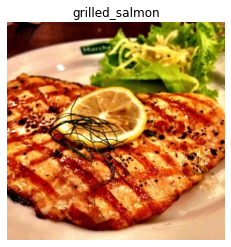

In [114]:
# Let's visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,   # we created this function before
                        target_class=random.choice(class_names))   # selects a class randomly

This is how we get familiar with the data, we visualize, visualize, and visualize it! We created the function to visualize before and the random selection is good to get a good grasp of the data, gives a good overview of the different type of images you are working with!

**Idea**: You could expand the `view_random_image` if you are working with multiclass data to plot more instances at once (using a subplot). 

Using this function, the objective is to get familiar with the data, to see how the classes/images look like! So this also gives us hints about if they would be difficult to discriminate or not, if they are noisy (e.g., the hamburger is with a lot of other food), etc.

### 2. Preprocess the data (prepare it for a model)

In [115]:
# Let's preprocess the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# So the important things here to be check/do are :
# 1. Turn all data into numbers (NN cannot handle images)
# 2. Make sure all images are in the right shape
# 3. Scale features (normalize (preferred) or standardize)

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),  # we could change this ofc, depends on our choice!
                                               batch_size=32,  # this is a good default, but we can tune it according to our hardware!
                                               class_mode="categorical")  # will do 2D one-hot encoded labels! (the data is categoricla = multi-class)

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224), 
                                               batch_size=32, 
                                               class_mode="categorical") 

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [116]:
# As in the inspection before, we see 750 x 10 images composing the training set and 250 x 10 composing the testing set.

### 3. Create a model (start with a baseline)

We have been talking a lot about the CNN explainer website...how about we just take their model (also on 10 classes) and use it for our problem? Let's do it!

In [117]:
from tensorflow.python import metrics
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Activation, Dense

# Create our model (very similar to previous models but actually the same as CNN explainer website)
model_8 = Sequential([
    Conv2D(filters=10, kernel_size=3, padding="valid", input_shape=(224, 224, 3)),
    Activation(activation="relu"),  # another way to design the architecture, putting the activation as a separate layer!
    Conv2D(filters=10, kernel_size=3),  # valid is defaul value for padding
    Activation("relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10, kernel_size=3, padding="valid", activation="relu"),
    Conv2D(filters=10, kernel_size=3, padding="valid", activation="relu"),
    MaxPool2D(pool_size=2),   
    Flatten(),
    Dense(10, activation="softmax")  # one output neuron is needed per class, and then the softmax activation! This is what is needed to handle the multi-class!!
])                                   # changed with respect model_7, to have 10 output neurons and use softmax as we change from binary to multi-class classification problem! 

# Compile the model
model_8.compile(loss="categorical_crossentropy", # before we used binary_crossentropy as the problem was binary; now we have to change it to categorical as the data is different!
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]) # we can keep the same as the data is balanced, we have the same data for each class

### 4. Fit the model

In [118]:
# Fit the model - easy job when it is compiled
history_8 = model_8.fit(train_data,  # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data), # we want the model to take enough steps through the training set, so take enough steps per epoch to go through every batch
                        validation_data=test_data,
                        validation_steps=len(test_data))  # if you want to validate a bit faster we can do something like int( 0.25 * len(test_data)), so it does not validates on the whole test set but a portion of it, in this case 25% (0.25)!

Epoch 1/5
235/235 [==============================] - 44s 183ms/step - loss: 2.2046 - accuracy: 0.1779 - val_loss: 2.0499 - val_accuracy: 0.2696
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.9530 - accuracy: 0.3119 - val_loss: 1.8717 - val_accuracy: 0.3472
Epoch 3/5
235/235 [==============================] - 42s 179ms/step - loss: 1.5882 - accuracy: 0.4687 - val_loss: 1.9543 - val_accuracy: 0.3412
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.9356 - accuracy: 0.6961 - val_loss: 2.5655 - val_accuracy: 0.2996
Epoch 5/5
235/235 [==============================] - 42s 181ms/step - loss: 0.3584 - accuracy: 0.8877 - val_loss: 3.5336 - val_accuracy: 0.2852


In [119]:
# The model seems to be learning something, even though the validation accuracy could be a bit higher, the training accuracy is pretty good!
# Guessing on ten classes evenly/uniformly distributed (same amount of data on each) we would be correct 1/10 times so around 10% (also predicting all the time the same class), the model is now correct 3 times better than guessing!!
# The model also took more time to fit as we are working/fitting to more data and also validating in more data, so training takes longer! It has more images to see to find patterns on them, the more data you have, the longer it will take!

### 5. Evaluate the model

In [120]:
# Evaluate on the test data (will show a similar or the same as last epoch)
model_8.evaluate(test_data)

79/79 [==============================] - 10s 130ms/step - loss: 3.5336 - accuracy: 0.2852


[3.5336315631866455, 0.28519999980926514]

In [121]:
# Remember guessing on 10 classes on randomly distributed data would be around 10%, so not bad
# Ideally we want more accuracy from our model, but initially is good to see that is doing better than guessing

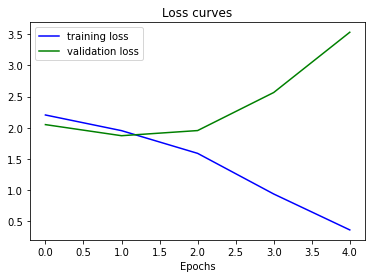

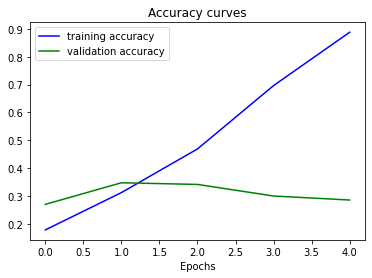

In [122]:
# Check out the model's loss curves on the classes (using the function we created before)
plot_loss_curves(history_8)

In [123]:
# So what are these curves telling us?
# The model is potentially overfitting on the training data (big gap between the curves) as ideally the curves should line up (loss curves both going down in roughly the same manner and accuracy curves going up similarly)
# They line up initially but soon the validation curve diverges from the training curve
# So it is learning the trianing data too well, and not generalizing well to unseen data, which is the validation data!

So, what do these loss curves tell us?

Well...it seems that our model is **overfitting** the training set quite badly...in other words, it is getting great results on the training data, but fails to generalize well to unseen data and performs poorly on the test dataset (e.g., the validation loss explodes in the last epochs). 

Overfitting is not so bad as means the model is learning something, but what is learning is not generalizing well to unseen data, so it is not something we want as we really want the model to generalize well. So the next step is to reduce overfitting! Let's go for it!

### 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it is clear that our model is learning something. 

However, it is not generalizing well to unseen data (overfitting).

So, let's try and fix overfitting by (check slide covered before about it; following there is a summary/ideas to try)...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns.
* **Get better data** - removing poor samples or adding better samples can improve model's performance.
* **Simplify the model** - if our current model is overfitting the data, it may be too complicated of a model (i.e., too many layers, so we have to reduce tham so it does not learn as much patterns, we basically force it to learn more generalizable patterns rather than specific patterns). Some ways to simplify a model are to: reduce the number of layers or reduce the number of hidden units in layers.
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data).
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset.

In [124]:
# How about we try and simplify our model first? (Easiest option to try)
model_8.summary()

# Let's try to remove 2 convolutional layers from model_8...

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                      

Ideally, our objective with these modifications is to obtain a higher accuracy in the validation set and also make the loss curves more similar (go down similarly/very close together). 

In [125]:
# Let's create the new model (simplify it) by removing two conv layers
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),   
    Flatten(),
    Dense(10, activation="softmax")  # one output neuron is needed per class, and then the softmax activation! This is what is needed to handle the multi-class!!
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [126]:
# The number of parameters did not actually change much, but let's just experiment and see what happens after the removal of the two layers!
# So let's fi it and see!

In [127]:
# Fit the model with 2x conv layers removed
history_9 = model_9.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data), 
                        validation_data=test_data,
                        validation_steps=len(test_data)) 

Epoch 1/5
235/235 [==============================] - 41s 174ms/step - loss: 2.4523 - accuracy: 0.2219 - val_loss: 1.9381 - val_accuracy: 0.3168
Epoch 2/5
235/235 [==============================] - 41s 177ms/step - loss: 1.8222 - accuracy: 0.3729 - val_loss: 1.9056 - val_accuracy: 0.3304
Epoch 3/5
235/235 [==============================] - 41s 173ms/step - loss: 1.5231 - accuracy: 0.4963 - val_loss: 2.0037 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 41s 173ms/step - loss: 1.1750 - accuracy: 0.6228 - val_loss: 2.1568 - val_accuracy: 0.3188
Epoch 5/5
235/235 [==============================] - 41s 173ms/step - loss: 0.7761 - accuracy: 0.7579 - val_loss: 2.4435 - val_accuracy: 0.3148


In [128]:
# Oh, seems that actually the model 9 is worse than model 8!
# Let's inspect the learning...

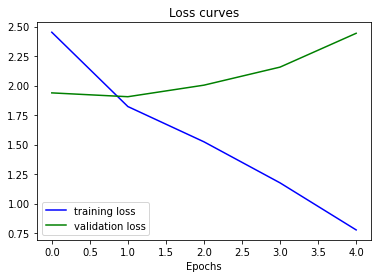

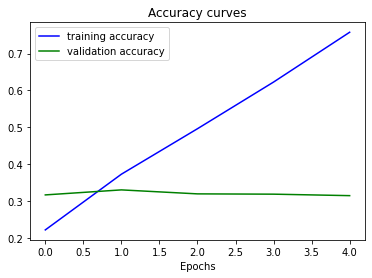

In [129]:
# Check out the loss curves
plot_loss_curves(history_9)

In [130]:
# Wooo, the validation loss curve is going to the moon, so no improvement there by removing two conv layers
# Why?
# The hint lies in the summary...
model_9.summary(), model_8.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

(None, None)

In [131]:
# Model 9 has actually more parameters! Even removing 2 layers, it is actually having more parameters
# What conv layers do is actually reducing the feature space, so removing the layers is actually widening the feature space!
# So adding a conv layer does not actually makes the model much more complex, but actually forces the model to try and learn the better features in the data

Looks like our "simplifying the model" experiment did not work, the accuracy went down and overfitting continued...

**IMPORTANT NOTE**: Not every experiment that you run will improve the results. That is why the motto of the ML practitioner is *experiment, experiment, experiment*. 

So let's try something else next as simplifying the model did not work! 

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Ideally, we want to:

* **Reduce overfitting** (get the train and validation loss curves closer)
* **Improve validation accuracy**

In [132]:
# Create an augmented data generator instance
# We will put some possibilities and values, but there are more, we could experiment with the values as well!
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical",
                                                                   shuffle=True)  # just for emphasis, it is actually the default value!

Found 7500 images belonging to 10 classes.


In [133]:
# Let's create another model but this time we wil fit it on the augmented training data of 10 classes

# But we are not going to rewrite it, we are going to clone the model_8 (tinyVGG architecture)
model_10 = tf.keras.models.clone_model(model_8) # it just clones the model architecture, does not clone the patterns learned, it resets all the learned patterns

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [134]:
# Before fitting, let's check if model_10 is a clone of model_8
model_8.summary(), model_10.summary()  # yes, exact same architecture, resetting the internally learned patterns

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 activation (Activation)     (None, 222, 222, 10)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 activation_1 (Activation)   (None, 220, 220, 10)      0         
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                      

(None, None)

In [135]:
# Fit the model on the augmented data
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 455ms/step - loss: 2.2276 - accuracy: 0.1743 - val_loss: 2.0503 - val_accuracy: 0.2468
Epoch 2/5
235/235 [==============================] - 105s 447ms/step - loss: 2.1029 - accuracy: 0.2535 - val_loss: 2.0024 - val_accuracy: 0.2996
Epoch 3/5
235/235 [==============================] - 104s 444ms/step - loss: 2.0587 - accuracy: 0.2779 - val_loss: 1.9408 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 105s 447ms/step - loss: 2.0461 - accuracy: 0.2848 - val_loss: 1.9132 - val_accuracy: 0.3484
Epoch 5/5
235/235 [==============================] - 105s 446ms/step - loss: 2.0084 - accuracy: 0.3040 - val_loss: 1.8724 - val_accuracy: 0.3680


In [136]:
# Remember that fitting on augmented data was taking more time than non-augmented data, and the function we use to generate the augmented data does it on the fly as it is being loaded into the model, so it requires resources!
# It keeps the original data unchanged!

In [137]:
# Seems the accuracy on the validation set improved a bit! Gooood!!
# Let's check the performance on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 3.5336 - accuracy: 0.2852


[3.5336315631866455, 0.28519999980926514]

In [138]:
model_10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.8724 - accuracy: 0.3680


[1.8723870515823364, 0.36800000071525574]

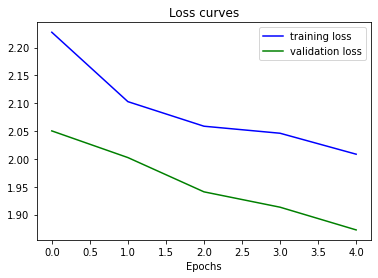

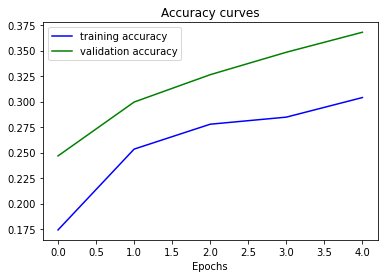

In [139]:
# Check out our model trained on augmented data's loss curves
plot_loss_curves(history_10)

In [140]:
# Goood, they look much better!!
# We can see that model_10 has a substantial increase in validation accuracy (almost 10%)
# And even better, the training and validation loss curves are heading in the right direction (downwards) and even it looks like that if we train our model for longer...
# they would keep decreasing and accuracy would keep increasing. The curves are not perfect but it is a lot better than before! (the validation was exploding upwards)


**Note**: That looks much better, the loss curves are much closer to each other than the baseline model and they look like they are heading in the right direction (certainly not the wrong direction), so if we were to train for longer, we might see further improvements.

So what comes next?

### 7. Repeat until satisfied

We could keep going here...continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy. We always try to improve our target metric (e.g., validation accuracy). 

How?

By running lots of experiments, namely:

* Reestructuring our model's architecture (e.g., increase layers/hidden units; or number of filters in the case of CNNs).
* Adjust the learning rate
* Try different methods of data augmentation (adjust the hyperparameters in our `ImageDataGenerator`instance). So, trying to see if different values lead to improved results.  
* Training for longer (e.g., 10 epochs instead of 5 epochs). 
* Try **transfer learning** (coming soon in next module)

There would be others ways to try from model perspective (e.g., change activation and/or optimization functions, fitting on more data) and data perspective (e.g., better data, more data). 

We are not going to deal with this more on this notebook, let's now try to predict on custom images...

### Making a prediction with our trained model (on custom images)

Let's use our trained model to make some predicitons on our own custom images!


In [141]:
# Let's remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [142]:
# Download some custom images
!wget https://cdn.britannica.com/31/122031-050-F8FCA663/Hamburger-cheeseburger.jpg
!wget https://assets.epicurious.com/photos/5761c748ff66dde1456dfec0/16:9/w_1280,c_limit/crispy-baked-chicken-wings.jpg
!wget https://blog.thermoworks.com/wp-content/uploads/2021/06/Ice_Cream_Compressed-43.jpg

--2022-09-20 05:53:01--  https://cdn.britannica.com/31/122031-050-F8FCA663/Hamburger-cheeseburger.jpg
Resolving cdn.britannica.com (cdn.britannica.com)... 13.224.250.100, 13.224.250.63, 13.224.250.84, ...
Connecting to cdn.britannica.com (cdn.britannica.com)|13.224.250.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198604 (194K) [image/jpeg]
Saving to: ‘Hamburger-cheeseburger.jpg’

Hamburger-cheesebur 100%[===================>] 193.95K  --.-KB/s    in 0.005s  

2022-09-20 05:53:01 (41.0 MB/s) - ‘Hamburger-cheeseburger.jpg’ saved [198604/198604]

--2022-09-20 05:53:01--  https://assets.epicurious.com/photos/5761c748ff66dde1456dfec0/16:9/w_1280,c_limit/crispy-baked-chicken-wings.jpg
Resolving assets.epicurious.com (assets.epicurious.com)... 151.101.0.239, 151.101.64.239, 151.101.128.239, ...
Connecting to assets.epicurious.com (assets.epicurious.com)|151.101.0.239|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146714 (143K) [image

In [143]:
# Adapting previous function for a multi-class setting instead of a binary setting
# Reconfig pred_and_plot function to work with multi-class images

def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model and plots the image with the predicted class as the title"
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)   # previously created function, returns a 3 dimensional tensor

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))  # expand the dimensions as our model expect 4 dimensional tensors (batch size as first dim)

  # Get the predicted class
  # Added logic for multi-class
  if len(pred[0]) > 1:   # softmax produces more than one number, as opposed to sigmoid, one for every class
    pred_class = class_names[tf.argmax(pred[0])] # select the position with the highest value, and the corresponding class name
  else: 
    pred_class = class_names[int(tf.round(pred[0]))]  # binary case

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

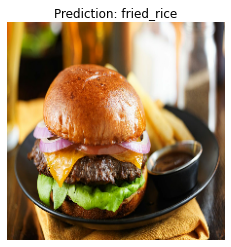

In [144]:
# Make a prediction using model_10 ( function created before)
pred_and_plot(model=model_10,
              filename="Hamburger-cheeseburger.jpg",
              class_names=class_names)

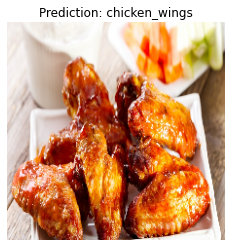

In [145]:
# More predictions...
pred_and_plot(model=model_10,
              filename="crispy-baked-chicken-wings.jpg",
              class_names=class_names)

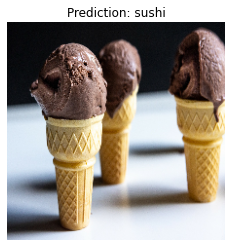

In [146]:
pred_and_plot(model=model_10,
              filename="Ice_Cream_Compressed-43.jpg",
              class_names=class_names)

In [147]:
# Seems the model is performing quite poorly, so we would be looking to definitely improve it before we deploy it! (We will improve it using transfer learning)
# But before, let's learn how to save and load it!

Looks like our model did not perform very well on our custom images, but this is because it only achieved roughly 37% accuracy on the test data. So we can expect it to function quite poorly on other unseen data (we will see how to improve it using transfer learning in the next module). 

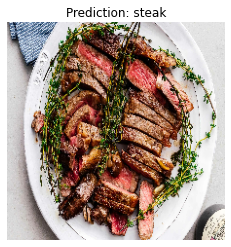

In [148]:
# Checking the pred_and_plot works well in the binary case...after the modification...
pred_and_plot(model=model_7,
              filename="how-to-cook-steak-1061w.jpg",
              class_names=["pizza", "steak"])

## Saving and loading our model

In [149]:
# Save a model
model_10.save("saved_trained_model_10")

In [150]:
# Load in a trained model and evaluate it (so we can check that the patterns and all was correctly saved)
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8724 - accuracy: 0.3680


[1.8723875284194946, 0.36800000071525574]

In [151]:
# Compare our loaded model to our existing model (should be the same as cell above)
model_10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.8724 - accuracy: 0.3680


[1.8723865747451782, 0.36800000071525574]

In [152]:
# Same exact results, model loaded successfully!!

Finished module (more exercises [here](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-03-computer-vision--convolutional-neural-networks-in-tensorflow-exercises))! Let's dive into **transfer learning** in the next one and use it to improve our model performance on the multi-class setting!